In [8]:
import numpy as np
from scipy.interpolate import splprep, splev
import matplotlib.pyplot as plt
# import mayavi.mlab as mplt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

## Define a borehole path

We define the trajectory of a borehole, using a series of x,y,z tuples, and make each component of the borehole an array. If we had a real well, we load the numbers from the deviation survey just the same.

In [9]:
trajectory = np.array([[   0,   0,    0],
                       [   0,   0, -100],
                       [   0,   0, -200],
                       [   5,   0, -300],
                       [  10,  10, -400],
                       [  20,  20, -500],
                       [  40,  80, -650],
                       [ 160, 160, -700],
                       [ 600, 400, -800],
                       [1500, 960, -800]])
x = trajectory[:,0]
y = trajectory[:,1]
z = trajectory[:,2]

But, since we want the borehole to be continuous and smoothly shaped, we can up-sample the borehole by finding the B-Spline representation of the well path,

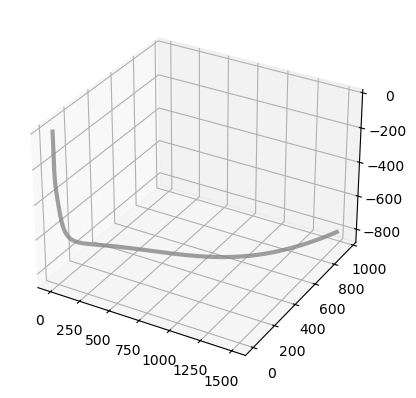

In [18]:
smoothness = 3.0
spline_order = 3
nest = -1 # estimate of number of knots needed (-1 = maximal)
knot_points, u = splprep([x,y,z], s=smoothness, k=spline_order, nest=-1)

# Evaluate spline, including interpolated points
x_int, y_int, z_int = splev(np.linspace(0, 1, 400), knot_points)

ax = plt.axes(projection='3d')
ax.plot(x_int, y_int, z_int, color='grey', lw=3, alpha=0.75)
plt.show()

## Define frac ports

Let's define a completion program so that our wellbore has 6 frac stages,

In [11]:
number_of_fracs = 6

and let's make it so that each one emanates from equally spaced frac ports spanning the bottom two-thirds of the well.

In [12]:
x_frac, y_frac, z_frac = splev(np.linspace(0.33, 1, number_of_fracs), knot_points)

Make a set of 3D axes, so we can plot the well path and the frac ports:

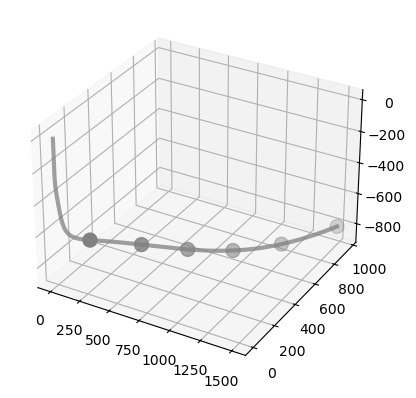

In [13]:
ax = plt.axes(projection='3d')
ax.plot(x_int, y_int, z_int, color='grey', lw=3, alpha=0.75)
ax.scatter(x_frac, y_frac, z_frac, s=100, c='grey')
plt.show()

Set a colour for each stage by cycling through red, green, and blue,

In [14]:
stage_color = []
for i in np.arange(number_of_fracs):
    color = (1.0, 0.1, 0.1)
    stage_color.append(np.roll(color, i))
stage_color = tuple(map(tuple, stage_color))

## Define microseismic points

One approach is to create some dimensions for each frac stage and generate 100 points randomly within each zone. Each frac has an *x* half-length, *y* half-length, and *z* half-length. Let's also vary these randomly for each of the 6 stages. Define the dimensions for each stage:

In [15]:
frac_dims = []
half_extents = [500, 1000, 250]
for i in range(number_of_fracs):
    for j in range(len(half_extents)):
        dim = np.random.rand(3)[j] * half_extents[j]
        frac_dims.append(dim)  
frac_dims = np.reshape(frac_dims, (number_of_fracs, 3))

Plot microseismic point clouds with 100 points for each stage. The following code should launch a 3D viewer scene in its own window:

In [16]:
size_scalar = 100000
mplt.plot3d(x_int, y_int, z_int, tube_radius=10)
for i in range(number_of_fracs):
    x_cloud = frac_dims[i,0] * (rand(100) - 0.5)
    y_cloud = frac_dims[i,1] * (rand(100) - 0.5)
    z_cloud = frac_dims[i,2] * (rand(100) - 0.5)

    x_event = x_frac[i] + x_cloud
    y_event = y_frac[i] + y_cloud     
    z_event = z_frac[i] + z_cloud
    
    # Let's make the size of each point inversely proportional 
    # to the distance from the frac port
    size = size_scalar / ((x_cloud**2 + y_cloud**2 + z_cloud**2)**0.002)
    
    mplt.points3d(x_event, y_event, z_event, size, mode='sphere', colormap='jet')

NameError: name 'mplt' is not defined

You can swap out the last line in the code block above with <code>mplt.points3d(x_event, y_event, z_event, size, mode='sphere', color = stage_color[i])</code> to colour each event by its corresponding stage.